## West Bank Displacement Data Analysis


    This notebook analyzes the displacement data due to demolitions in the West Bank, aiming to provide insights that aid decision-making.
    "
    The data is divided into two parts:
    1. **IDPs in WestBank since 2009**: This dataset contains information on the number of Internally Displaced Persons (IDPs), demolished structures, and affected people by governorate since 2009.
    2. **IDPs in WestBank by Year**: This dataset focuses on yearly changes, providing similar data for each year.
        

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
idps_since_2009 = pd.read_excel('libs\data-points\spreadsheets\xslx\West Bank - Displacement due to Demolitions.xlsx', sheet_name='IDPs in WestBank since 2009')
idps_by_year = pd.read_excel('libs\data-points\spreadsheets\xslx\West Bank - Displacement due to Demolitions.xlsx', sheet_name='IDPs in WestBank by Year')

# Preview the data
idps_since_2009.head(), idps_by_year.head()
    

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 29-30: truncated \xXX escape (1304815374.py, line 6)

### 1. Total IDPs by Governorate (2009-present)

In [52]:
from IPython.display import display, Markdown

# Sum the fields from the dataset
total_demolished_structures = idps_since_2009['Demolished Structures'].sum()
total_displaced_people = idps_since_2009['IDPs'].sum()
total_affected_people = idps_since_2009['Affected people'].sum()

# Display counters using Markdown for styling
display(Markdown(f'''
<div style="display: flex; justify-content: space-around;">
    <div style="padding: 20px; background-color: #f0f0f0; text-align: center;">
        <h1>{total_demolished_structures}</h1>
        <p style="color: brown;">Demolished Structures</p>
    </div>
    <div style="padding: 20px; background-color: #f0f0f0; text-align: center;">
        <h1>{total_displaced_people}</h1>
        <p style="color: brown;">Displaced People</p>
    </div>
    <div style="padding: 20px; background-color: #f0f0f0; text-align: center;">
        <h1>{total_affected_people}</h1>
        <p style="color: brown;">Affected People</p>
    </div>
</div>
'''))



<div style="display: flex; justify-content: space-around;">
    <div style="padding: 20px; background-color: #f0f0f0; text-align: center;">
        <h1>10459</h1>
        <p style="color: brown;">Demolished Structures</p>
    </div>
    <div style="padding: 20px; background-color: #f0f0f0; text-align: center;">
        <h1>15784</h1>
        <p style="color: brown;">Displaced People</p>
    </div>
    <div style="padding: 20px; background-color: #f0f0f0; text-align: center;">
        <h1>648325</h1>
        <p style="color: brown;">Affected People</p>
    </div>
</div>


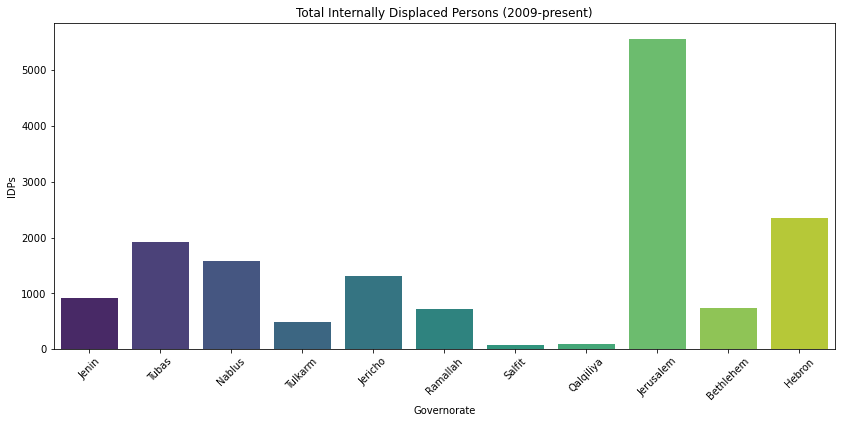

In [54]:

plt.figure(figsize=(14, 6))
sns.barplot(data=idps_since_2009, x='Governorate', y='IDPs', palette='viridis')
plt.title('Total Internally Displaced Persons (2009-present)')
plt.xticks(rotation=45)
plt.ylabel('IDPs')
plt.show()
    

### 2. Total Demolished Structures (2009-present)

In [57]:
import plotly.express as px

# Create the interactive line plot using Plotly
fig = px.line(idps_by_year, x='Year', y='IDPs', color='Governorate', 
              title='Number of IDPs over Time (Yearly)',
              labels={'IDPs': 'Number of Internally Displaced Persons', 'Year': 'Year'},
              markers=True)

# Customize the layout for better presentation
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Internally Displaced Persons",
    legend_title="Governorate",
    hovermode="x unified",
    template="plotly_white"
)

# Show the interactive plot
fig.show()


C:\Users\faraz\AppData\Local\Temp/ipykernel_4148/582950385.py:15: UserWarning:

FixedFormatter should only be used together with FixedLocator

C:\Users\faraz\AppData\Local\Temp/ipykernel_4148/582950385.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



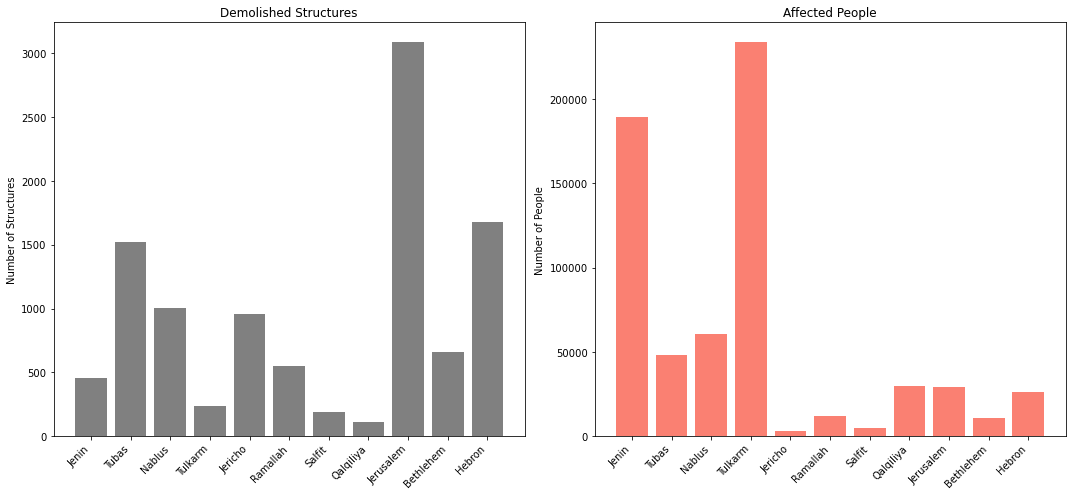

In [50]:
import matplotlib.pyplot as plt

# Data
governorates = idps_since_2009['Governorate']
demolished_structures = idps_since_2009['Demolished Structures']
affected_people = idps_since_2009['Affected people']

# Create figure and subplots arranged side by side (ncols=2)
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Bar chart for Demolished Structures
axs[0].bar(governorates, demolished_structures, color='gray')
axs[0].set_title('Demolished Structures')
axs[0].set_ylabel('Number of Structures')
axs[0].set_xticklabels(governorates, rotation=45, ha='right')

# Bar chart for Affected People
axs[1].bar(governorates, affected_people, color='salmon')
axs[1].set_title('Affected People')
axs[1].set_ylabel('Number of People')
axs[1].set_xticklabels(governorates, rotation=45, ha='right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
import plotly.express as px

# Create a histogram of demolished structures by governorate
fig = px.histogram(idps_by_year, x='Governorate', y='Demolished Structures',
                   nbins=len(idps_by_year['Governorate'].unique()),  # Number of bins equals the number of unique governorates
                   title='Distribution of Demolished Structures by Governorate',
                   labels={'Demolished Structures': 'Number of Demolished Structures', 'Governorate': 'Governorate'},
                   color='Year',  # Color by year
                   barmode='group')  # Group bars by year for comparison

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Governorate",
    yaxis_title="Number of Demolished Structures",
    template="plotly_white",
    bargap=0.2  # Gap between bars
)

# Show the interactive plot
fig.show()


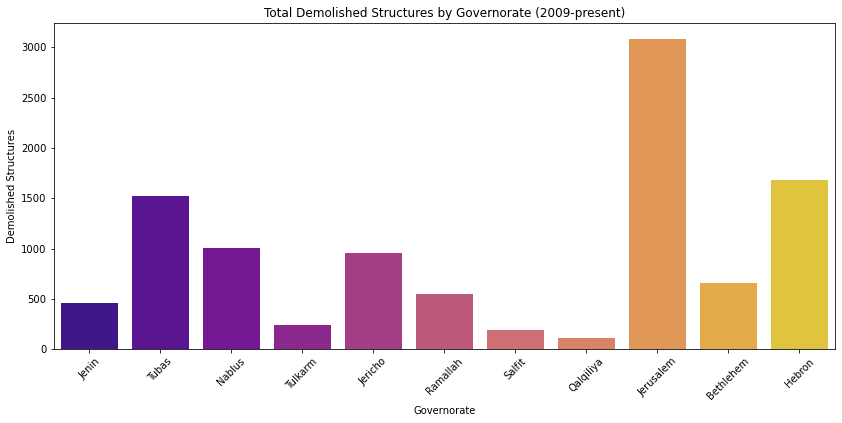

In [3]:

plt.figure(figsize=(14, 6))
sns.barplot(data=idps_since_2009, x='Governorate', y='Demolished Structures', palette='plasma')
plt.title('Total Demolished Structures by Governorate (2009-present)')
plt.xticks(rotation=45)
plt.ylabel('Demolished Structures')
plt.show()
    

### 3. Total Affected People by Governorate (2009-present)

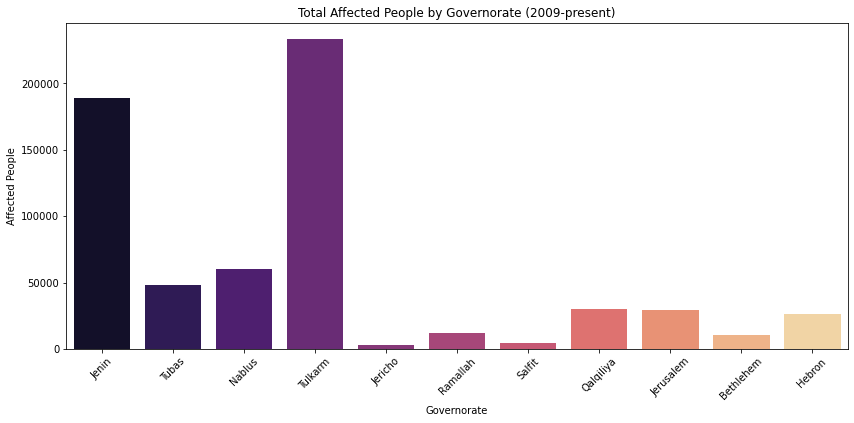

In [4]:

plt.figure(figsize=(14, 6))
sns.barplot(data=idps_since_2009, x='Governorate', y='Affected people', palette='magma')
plt.title('Total Affected People by Governorate (2009-present)')
plt.xticks(rotation=45)
plt.ylabel('Affected People')
plt.show()
    

In [33]:
import plotly.express as px

fig = px.histogram(idps_by_year, x='Year', y='Demolished Structures',
                   nbins=len(idps_by_year['Year'].unique()),  # Number of bins equals the number of unique years
                   title='Distribution of Demolished Structures by Year',
                   labels={'Demolished Structures': 'Number of Demolished Structures', 'Year': 'Year'},
                   color='Governorate',  # Color by governorate
                   barmode='stack')  # Stack bars by governorate

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Number of Demolished Structures",
    template="plotly_white",
    bargap=0.05,  # Reduce the gap between bars for better width
    bargroupgap=0.1,  # Slightly adjust gap between groups (if using grouped bars)
    title={
        'text': "Distribution of Demolished Structures by Year",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        tickmode='linear',
        tick0=1,
        dtick=1  # Ensure each year is displayed on the x-axis
    )
)

# Show the interactive plot
fig.show()


### 6. Total Affected People over Time (Yearly)

In [34]:
import plotly.express as px

# Create a bubble chart to visualize affected people over time by governorate
fig = px.scatter(idps_by_year, x='Year', y='Governorate', size='Affected people', color='Governorate',
                 title='Affected People Over Time by Governorate',
                 labels={'Affected people': 'Number of Affected People', 'Year': 'Year'},
                 hover_name='Governorate', size_max=60)

# Update layout for better appearance
fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Governorate",
    template="plotly_white"
)

# Show the interactive plot
fig.show()
